In [16]:
import json
import numpy as np
import os

results_dir = "/Users/kshitij/Documents/UPSaclay/T4/InfoRetrieval/github/not_git/best_pipeline_search_results"
files = os.listdir(results_dir)

for i in files:
    if i=="fused_results_rrf.json":
        continue
    print(i)
    with open(os.path.join(results_dir, i)) as f:
        results = json.load(f)
    true_scores = []
    for i in results["true_segments"]:
        true_scores += list(results["true_segments"][i].values())
    print("max of true scores", np.max(true_scores))
    print("min of true scores", np.min(true_scores))
    print("mean of true scores", np.mean(true_scores))
    print("median of true scores", np.median(true_scores))
    print("recall_at_10", results["recall_at_10"])
    print("mean_rank", results["mean_rank"])
    print("mean_inv_rank", results["mean_inv_rank"])
    print()
    

    


PatentSBERTa_claims_claims_results.json
max of true scores 0.9976216554641724
min of true scores 0.5284088850021362
mean of true scores 0.8122842662315577
median of true scores 0.8148515820503235
recall_at_10 0.4568242814619627
mean_rank 38.818186697896856
mean_inv_rank 0.2833406867113786

PatentSBERTa_TAC_TAC_results.json
max of true scores 0.9922178387641907
min of true scores 0.558128297328949
mean of true scores 0.7966771529654112
median of true scores 0.7976037263870239
recall_at_10 0.5296857463524127
mean_rank 31.680405504318557
mean_inv_rank 0.32925121807953855

PatentSBERTa_TAC_TA_results.json
max of true scores 0.962474524974823
min of true scores 0.3110102713108063
mean of true scores 0.701722711480743
median of true scores 0.7043667137622833
recall_at_10 0.41974088713219143
mean_rank 41.712323720294705
mean_inv_rank 0.25527773410225746

PatentSBERTa_claims_TA_results.json
max of true scores 0.9638068675994873
min of true scores 0.3343903720378876
mean of true scores 0.678778

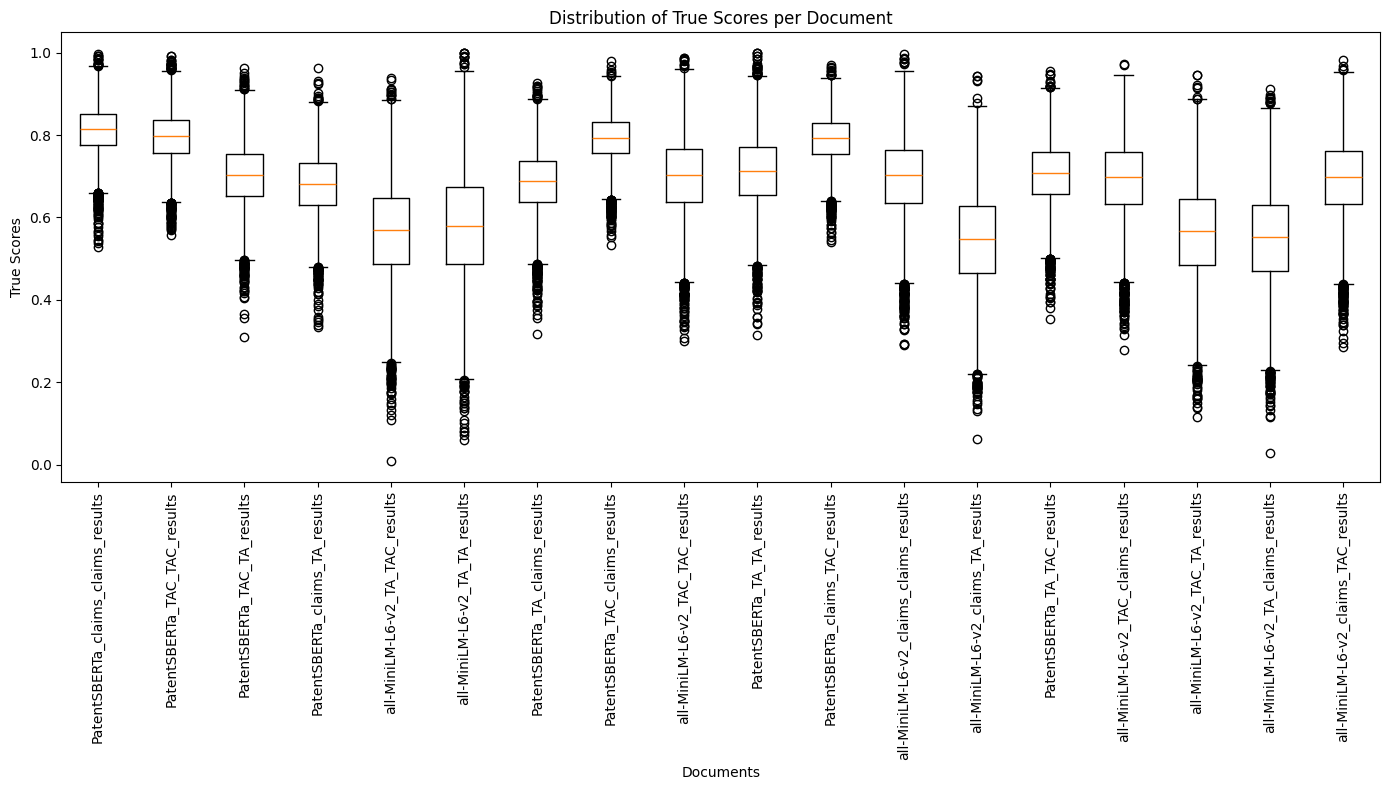

In [5]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

results_dir = "/Users/kshitij/Documents/UPSaclay/T4/InfoRetrieval/github/not_git/best_pipeline_search_results"
files = os.listdir(results_dir)

all_true_scores = []
doc_names = []

for file in files:
    if file=="fused_results_rrf.json":
        continue
    with open(os.path.join(results_dir, file)) as f:
        results = json.load(f)
    true_scores = []
    # Extract scores from all segments in the document
    for seg_id in results["true_segments"]:
        true_scores += list(results["true_segments"][seg_id].values())
    all_true_scores.append(true_scores)
    doc_names.append(os.path.splitext(file)[0])  # Use filename without extension

# Create a boxplot
plt.figure(figsize=(14, 8))
plt.boxplot(all_true_scores, vert=True)
plt.xticks(range(1, len(doc_names) + 1), doc_names, rotation=90)
plt.xlabel('Documents')
plt.ylabel('True Scores')
plt.title('Distribution of True Scores per Document')
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

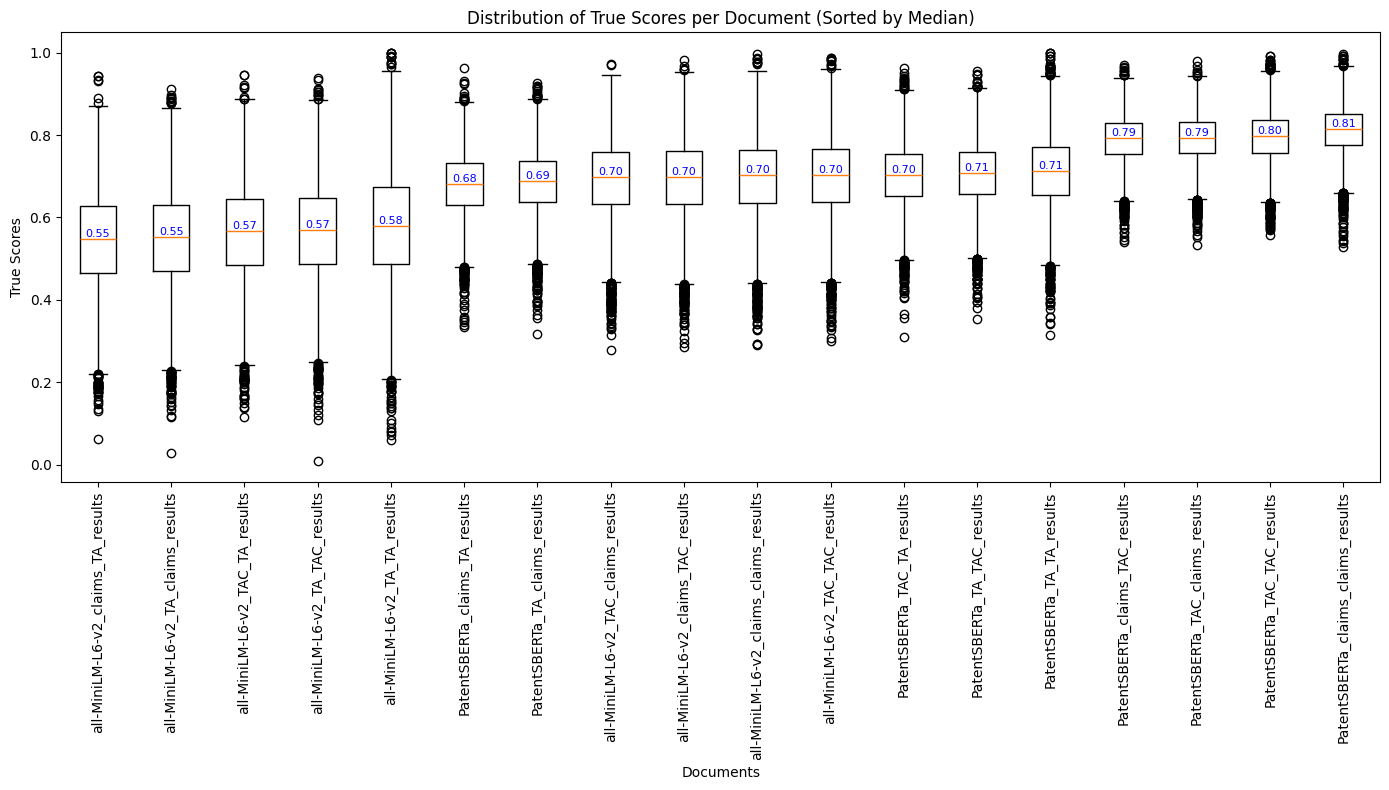

In [ ]:
# Compute medians with corresponding indices
medians = [np.median(scores) for scores in all_true_scores]
sorted_data = sorted(zip(medians, doc_names, all_true_scores))

# Unzip the sorted data
sorted_medians, sorted_doc_names, sorted_true_scores = zip(*sorted_data)

# Plot
plt.figure(figsize=(14, 8))
plt.boxplot(sorted_true_scores, vert=True)
plt.xticks(range(1, len(sorted_doc_names) + 1), sorted_doc_names, rotation=90)
plt.xlabel('Documents')
plt.ylabel('True Scores')
plt.title('Distribution of True Scores per Document (Sorted by Median)')

# Annotate medians
for i, median in enumerate(sorted_medians, start=1):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=8, color='blue')

plt.tight_layout()
plt.show()


In [10]:
import numpy as np

def softmax(x):
    e_x = np.exp(x - np.max(x))  # for numerical stability
    return e_x / e_x.sum()

scores = [0.81, 0.8, 0.79, 0.79, 0.71, 0.71]
print(softmax(scores))

[0.17360743 0.17188001 0.17016978 0.17016978 0.1570865  0.1570865 ]


In [14]:
incoming_dtype = ["claims","TAC","TAC","claims","TA","TAC"] ## what part of incoming patent to consider
existing_dtype = ["claims","TAC","claims","TAC", "TAC", "TA"] ## with what part of existing patent
weigths_patentsbert = np.array([0.8]*len(incoming_dtype))

incoming_dtype = ["claims", "TAC", "claims"] ## what part of incoming patent to comapre with
existing_dtype = ["TAC", "claims", "claims"] ## what part of existing patent

weigths_minilm = np.array([0.7]*len(incoming_dtype))

weigths = np.concatenate((weigths_patentsbert, weigths_minilm))
weigths_minilm = weigths_minilm/np.sum(weigths)

In [15]:
weigths

array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7, 0.7, 0.7])